In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv("6H.csv")
dataset = dataset.iloc[11:, :]*10**5 - 121325
openVal = dataset.iloc[:, 34]
closeVal = dataset.iloc[:, 37]
openVal = openVal
closeVal = closeVal
openVal = openVal.values
closeVal = closeVal.values
test = []
for i in range(len(openVal)):
    if closeVal[i] - openVal[i] < 0:
        test.append(0)
    else:
        test.append(1)
print(openVal)
print(closeVal)
print(test)

[-18065. -18075. -17975. ...  -9930. -10042. -10193.]
[-18065. -17925. -17805. ... -10042. -10191. -10079.]
[1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 

In [4]:
print(max(dataset.iloc[:, 1:].max()))
print(min(dataset.iloc[:, 1:].min()))

39055.0
-39055.0


# Find high value by open value

In [5]:
x = dataset.iloc[:, 1:35].values
y = dataset.iloc[:,   35].values
y = y.reshape(len(y),1)
print(x)
print(y)

[[-20595. -19425. -20595. ... -17435. -18185. -18065.]
 [-19615. -19515. -20395. ... -17835. -18315. -18075.]
 [-20145. -19565. -20785. ... -17925. -18225. -17975.]
 ...
 [ -8952.  -8627.  -9157. ...  -9908. -10091.  -9930.]
 [ -8955.  -8870.  -9236. ...  -9876. -10109. -10042.]
 [ -9062.  -8998.  -9162. ...  -9944. -10245. -10193.]]
[[-17835.]
 [-17925.]
 [-17505.]
 ...
 [ -9876.]
 [ -9944.]
 [-10022.]]


In [6]:
from xgboost import XGBRegressor
regressorHigh = XGBRegressor()
regressorHigh.fit(x, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [7]:
yPredHigh = regressorHigh.predict((x[:, :]))
np.set_printoptions(precision=2)
y = dataset.iloc[:, 35]
y = y.values
print(np.concatenate((yPredHigh.reshape(len(yPredHigh), 1), y.reshape(len(y), 1)), 1))

[[-17656.15 -17835.  ]
 [-17684.89 -17925.  ]
 [-17770.17 -17505.  ]
 ...
 [ -9678.44  -9876.  ]
 [ -9844.1   -9944.  ]
 [ -9882.17 -10022.  ]]


In [8]:
from sklearn.metrics import r2_score
r2_score(y, yPredHigh)

0.9998597805918763

In [9]:
diffHigh = []
for i in range(len(y)):
    diffHigh.append(abs(y[i] - yPredHigh[i]))
print(max(diffHigh))
print(np.mean(diffHigh))

2064.6474609375
135.67345107946414


# Find next low

In [10]:
x = dataset.iloc[:, 1:35]
x = x.values
x = np.concatenate((x, yPredHigh.reshape(len(yPredHigh), 1)), 1)
print(x)

[[-20595.   -19425.   -20595.   ... -18185.   -18065.   -17656.15]
 [-19615.   -19515.   -20395.   ... -18315.   -18075.   -17684.89]
 [-20145.   -19565.   -20785.   ... -18225.   -17975.   -17770.17]
 ...
 [ -8952.    -8627.    -9157.   ... -10091.    -9930.    -9678.44]
 [ -8955.    -8870.    -9236.   ... -10109.   -10042.    -9844.1 ]
 [ -9062.    -8998.    -9162.   ... -10245.   -10193.    -9882.17]]


In [11]:
y = dataset.iloc[:, 36]
y = y.values
y = y.reshape(len(y),1)
print(y)

[[-18315.]
 [-18225.]
 [-18055.]
 ...
 [-10109.]
 [-10245.]
 [-10203.]]


In [12]:
from xgboost import XGBRegressor
regressorLow = XGBRegressor()
regressorLow.fit(x, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [13]:
yPredLow = regressorLow.predict((x[:, :]))
np.set_printoptions(precision=2)
y = dataset.iloc[:, 36].values
print(np.concatenate((yPredLow.reshape(len(yPredLow), 1), y.reshape(len(y), 1)), 1))

[[-18376.66 -18315.  ]
 [-18254.34 -18225.  ]
 [-18157.62 -18055.  ]
 ...
 [-10051.76 -10109.  ]
 [-10327.01 -10245.  ]
 [-10281.14 -10203.  ]]


In [14]:
from sklearn.metrics import r2_score
r2_score(y, yPredLow)

0.9998638570639095

In [15]:
diffLow = []
for i in range(len(y)):
    diffLow.append(abs(y[i] - yPredLow[i]))
print(max(diffLow))
print(np.mean(diffLow))

2330.5390625
133.76187494052704


# Find close

In [16]:
x = dataset.iloc[:, 1:35]
x = x.values
x = np.concatenate((x, yPredHigh.reshape(len(yPredHigh), 1)), 1)
x = np.concatenate((x, yPredLow.reshape(len(yPredLow), 1)), 1)
print(x)

[[-20595.   -19425.   -20595.   ... -18065.   -17656.15 -18376.66]
 [-19615.   -19515.   -20395.   ... -18075.   -17684.89 -18254.34]
 [-20145.   -19565.   -20785.   ... -17975.   -17770.17 -18157.62]
 ...
 [ -8952.    -8627.    -9157.   ...  -9930.    -9678.44 -10051.76]
 [ -8955.    -8870.    -9236.   ... -10042.    -9844.1  -10327.01]
 [ -9062.    -8998.    -9162.   ... -10193.    -9882.17 -10281.14]]


In [17]:
y = dataset.iloc[:, 37]
y = y.values
y = y.reshape(len(y),1)
print(y)

[[-18065.]
 [-17925.]
 [-17805.]
 ...
 [-10042.]
 [-10191.]
 [-10079.]]


In [18]:
from xgboost import XGBRegressor
regressorClose = XGBRegressor()
regressorClose.fit(x, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [19]:
yPredClose = regressorClose.predict((x[:, :]))
np.set_printoptions(precision=2)
y = dataset.iloc[:, 37].values
print(np.concatenate((yPredClose.reshape(len(yPredClose), 1), y.reshape(len(y), 1)), 1))

[[-17902.43 -18065.  ]
 [-17884.89 -17925.  ]
 [-17960.21 -17805.  ]
 ...
 [ -9821.79 -10042.  ]
 [-10070.17 -10191.  ]
 [-10070.17 -10079.  ]]


In [20]:
from sklearn.metrics import r2_score
r2_score(y, yPredClose)

0.9997934982767406

In [21]:
diffClose = []
for i in range(len(y)):
    diffClose.append(abs(y[i] - yPredClose[i]))
print(max(diffClose))
print(np.mean(diffClose))

1612.1627807617188
167.3450369764521


# Checking ascending

In [22]:
x = dataset.iloc[:, 1:35]
x = x.values
x = np.concatenate((x, yPredHigh.reshape(len(yPredHigh), 1)), 1)
x = np.concatenate((x, yPredLow.reshape(len(yPredLow), 1)), 1)
print(x)

[[-20595.   -19425.   -20595.   ... -18065.   -17656.15 -18376.66]
 [-19615.   -19515.   -20395.   ... -18075.   -17684.89 -18254.34]
 [-20145.   -19565.   -20785.   ... -17975.   -17770.17 -18157.62]
 ...
 [ -8952.    -8627.    -9157.   ...  -9930.    -9678.44 -10051.76]
 [ -8955.    -8870.    -9236.   ... -10042.    -9844.1  -10327.01]
 [ -9062.    -8998.    -9162.   ... -10193.    -9882.17 -10281.14]]


In [23]:
from xgboost import XGBClassifier
classifierAscending = XGBClassifier()
classifierAscending.fit(x, test)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
yPred = classifierAscending.predict(x)
cm = confusion_matrix(test, yPred)
print(cm)
accuracy_score(test, yPred)

[[ 8530  3451]
 [ 1873 10605]]


0.7823296128214563

In [25]:
prediction = []
openValues = dataset.iloc[:, 34]
openValues = np.array(openValues)
print(openValues.shape)
for i in range(len(yPredClose)):
    if yPredClose[i] > openValues[i]:
        prediction.append(1)
    else:
        prediction.append(0)
cm = confusion_matrix(test, prediction)
print(cm)
accuracy_score(test, prediction)

(24459,)
[[8359 3622]
 [3546 8932]]


0.7069381413794513

In [26]:
diffHigh = np.array(diffHigh)
diffHigh = diffHigh.reshape(len(diffHigh), 1)
diffLow = np.array(diffLow)
diffLow = diffLow.reshape(len(diffLow), 1)
diffClose = np.array(diffClose)
diffClose = diffClose.reshape(len(diffClose), 1)
df = pd.DataFrame(np.array(diffClose))
diffHigh = np.array(diffHigh)
diffLow = np.array(diffLow)
df.insert(0, 'close error', diffClose)
df.insert(0, 'low error', diffLow)
df.insert(0, 'high error', diffHigh)
df.to_csv('errors.csv')

In [27]:
dataset = pd.read_csv('errors.csv')
dataset = dataset.iloc[:, 1:-1]
print(dataset)

       high error   low error  close error
0      178.845703   61.656250   162.572266
1      240.111328   29.339844    40.111328
2      265.166016  102.617188   155.214844
3      180.007813  155.900391   271.164062
4      316.542969  358.962891   157.144531
...           ...         ...          ...
24454  288.960937  181.292969   220.552734
24455    4.800781  193.006836   140.168945
24456  197.558594   57.238281   220.212891
24457   99.896484   82.013672   120.831055
24458  139.833008   78.140625     8.831055

[24459 rows x 3 columns]


In [28]:
x = []
for i in range(24459):
    x.append(i)

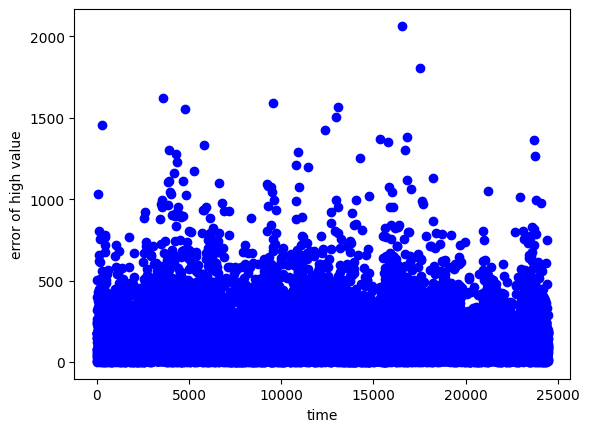

In [29]:
high = dataset.iloc[:, 0].values
plt.scatter(x=x, y=high, c='blue')
plt.xlabel('time')
plt.ylabel('error of high value')
plt.rcParams["figure.figsize"] = (20,3)
plt.show()

In [30]:
counterHigh = 0
for i in range(len(high)):
    if high[i] < 100:
        counterHigh += 1
print(counterHigh)

11697


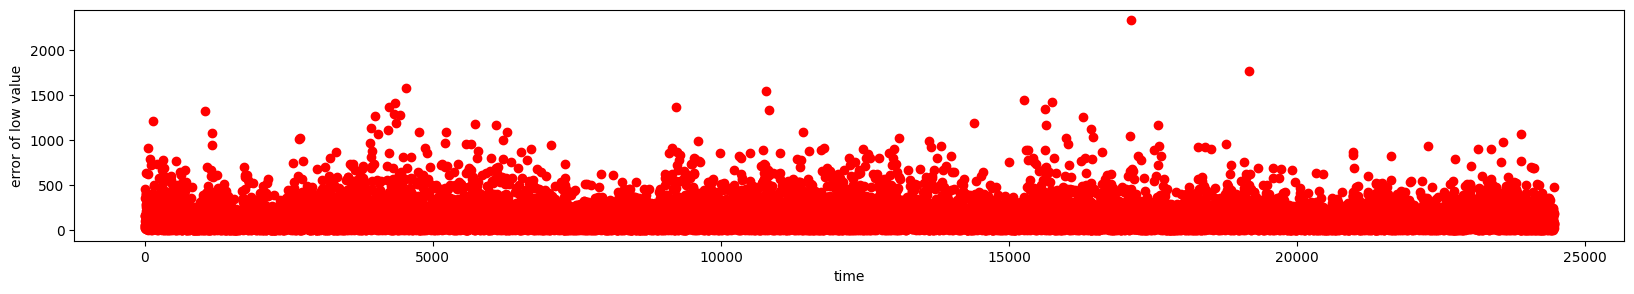

In [31]:
low = dataset.iloc[:, 1].values
plt.scatter(x=x, y=low, c='red')
plt.xlabel('time')
plt.ylabel('error of low value')
plt.rcParams["figure.figsize"] = (20,3)
plt.show()

In [32]:
counterLow = 0
for i in range(len(low)):
    if low[i] < 100:
        counterLow+=1
print(counterLow)

11892


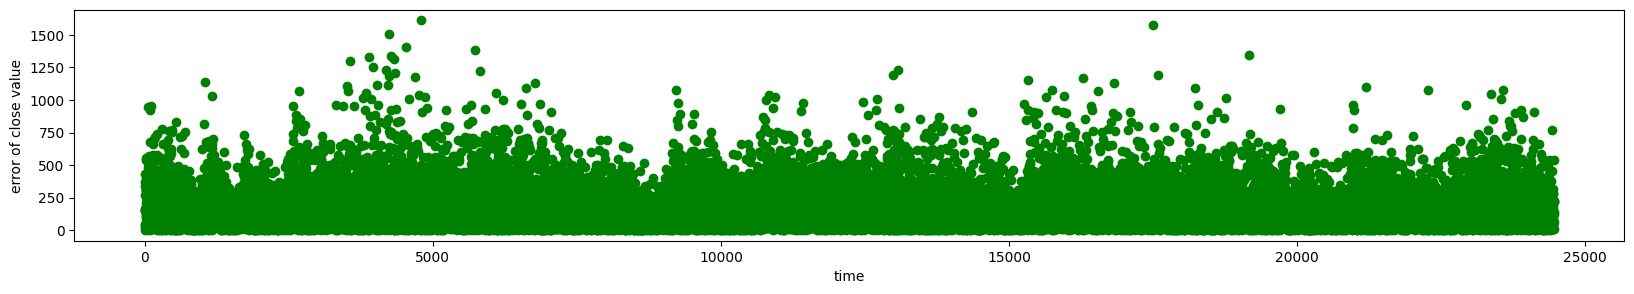

In [33]:
close = dataset.iloc[:, 2].values
plt.scatter(x=x, y=close, c='green')
plt.xlabel('time')
plt.ylabel('error of close value')
plt.rcParams["figure.figsize"] = (20,3)
plt.show()

In [34]:
counterClose = 0
for i in range(len(close)):
    if close[i] < 100:
        counterClose+=1
print(counterClose)

10212


In [35]:
print("percent of under 100 for high is " + str((counterHigh/len(high))*100))
print("percent of under 100 for low is " + str((counterLow/len(low))*100))
print("percent of under 100 for close is " + str((counterClose/len(close))*100))

percent of under 100 for high is 47.82288728075555
percent of under 100 for low is 48.62013982583098
percent of under 100 for close is 41.751502514411875


In [36]:
counterHigh = 0
for i in range(len(high)):
    if high[i] < 200:
        counterHigh += 1
counterLow = 0
for i in range(len(low)):
    if low[i] < 200:
        counterLow+=1
counterClose = 0
for i in range(len(close)):
    if close[i] < 200:
        counterClose+=1
print("percent of under 200 for high is " + str((counterHigh/len(high))*100))
print("percent of under 200 for low is " + str((counterLow/len(low))*100))
print("percent of under 200 for close is " + str((counterClose/len(close))*100))

percent of under 200 for high is 79.85199721983727
percent of under 200 for low is 79.9910053559017
percent of under 200 for close is 69.3200866756613


In [37]:
counterHigh = 0
for i in range(len(high)):
    if high[i] < 150:
        counterHigh += 1
counterLow = 0
for i in range(len(low)):
    if low[i] < 150:
        counterLow+=1
counterClose = 0
for i in range(len(close)):
    if close[i] < 150:
        counterClose+=1
print("percent of under 150 for high is " + str((counterHigh/len(high))*100))
print("percent of under 150 for low is " + str((counterLow/len(low))*100))
print("percent of under 150 for close is " + str((counterClose/len(close))*100))

percent of under 150 for high is 66.60533954781471
percent of under 150 for low is 67.07960260026984
percent of under 150 for close is 57.44715646592257


In [38]:
dataset

,high error,low error,close error
0,178.845703,61.656250,162.572266
1,240.111328,29.339844,40.111328
2,265.166016,102.617188,155.214844
3,180.007813,155.900391,271.164062
4,316.542969,358.962891,157.144531
...,...,...,...
24454,288.960937,181.292969,220.552734
24455,4.800781,193.006836,140.168945
24456,197.558594,57.238281,220.212891
24457,99.896484,82.013672,120.831055
